<div align=center>

# Basic Example of CNN Application

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Prerequisites


In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

### Loading the MNIST Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Data Preprocessing


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Visualizing the Dataset


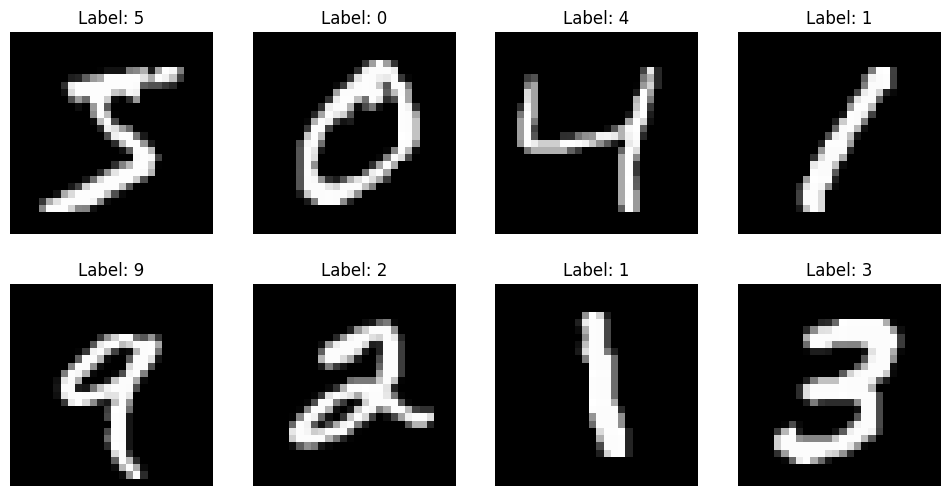

In [4]:
sample_images = x_train[:8, :, :]
sample_labels = y_train[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :], cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

### Building the CNN Model


In [5]:
model = models.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))

model.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
        strides=(1, 1),
    )
)

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
        strides=(1, 1),
    )
)

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

### Training the Model


In [6]:
model.fit(
    x_train,
    y_train,
    epochs=2,
    batch_size=64,
    validation_data=(x_test, y_test),
)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8870 - loss: 0.3841 - val_accuracy: 0.9834 - val_loss: 0.0508
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9841 - loss: 0.0525 - val_accuracy: 0.9878 - val_loss: 0.0390


In [8]:
model.predict(sample_images).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([3, 0, 4, 1, 9, 2, 1, 3], dtype=int64)